#Bank Customer Churn Prediction

The notebook aims at applying descriptive statistics and Deep learning techniques to predict customer churn using binary classification.

**Meaning of Churn** - Churn rate (sometimes called attrition rate), in its broadest sense, is a measure of the number of individuals or items moving out of a collective group over a specific period. It is one of two primary factors that determine the steady-state level of customers a business will support.



##1. Loading Data and Packages

In [0]:
# Importing the Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


##2. The statistical summary of the dataset

In [3]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [4]:
# checking datatypes and null values
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


##3. Data Visualization

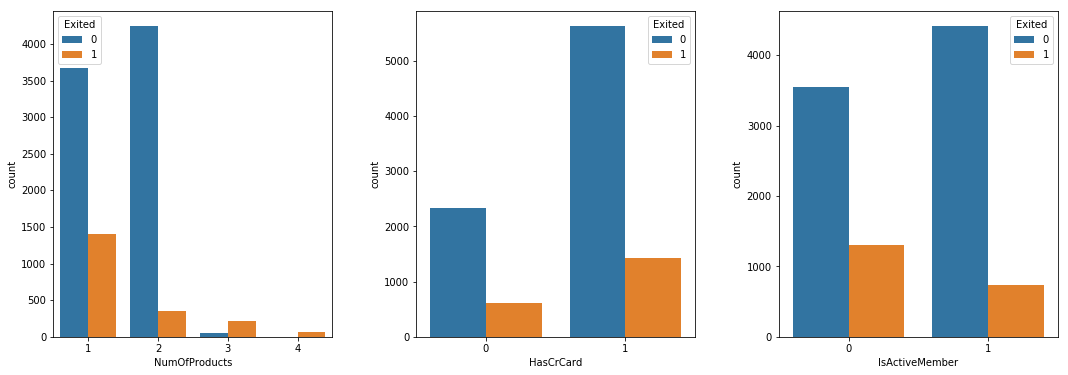

In [5]:
_, ax = plt.subplots(1, 3, figsize=(18, 6))
plt.subplots_adjust(wspace=0.3)
sns.countplot(x = "NumOfProducts", hue="Exited", data = dataset, ax= ax[0])
sns.countplot(x = "HasCrCard", hue="Exited", data = dataset, ax = ax[1])
sns.countplot(x = "IsActiveMember", hue="Exited", data = dataset, ax = ax[2])

Customer with 1 or 2 products are having higher chances to Churn

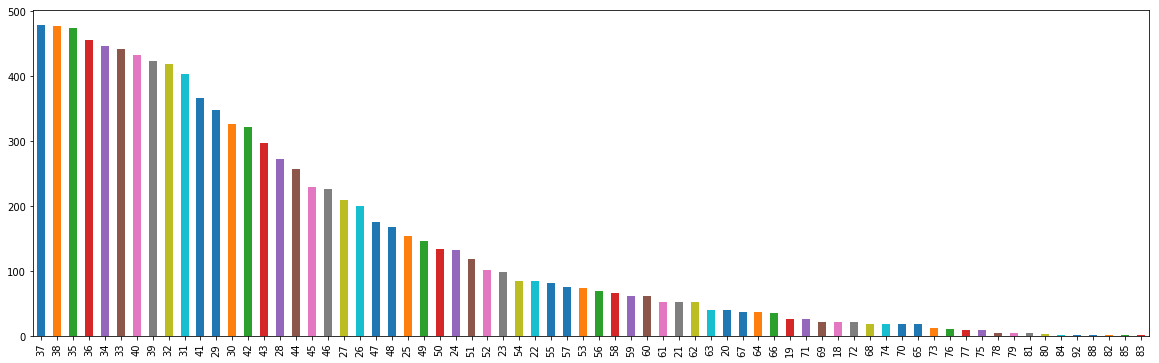

In [6]:
dataset["Age"].value_counts().plot.bar(figsize=(20,6))

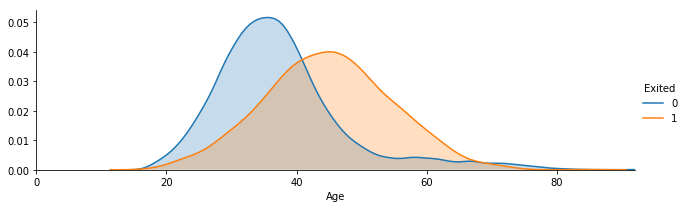

In [7]:
facet = sns.FacetGrid(dataset, hue="Exited",aspect=3)
facet.map(sns.kdeplot,"Age",shade= True)
facet.set(xlim=(0, dataset["Age"].max()))
facet.add_legend()
plt.show()

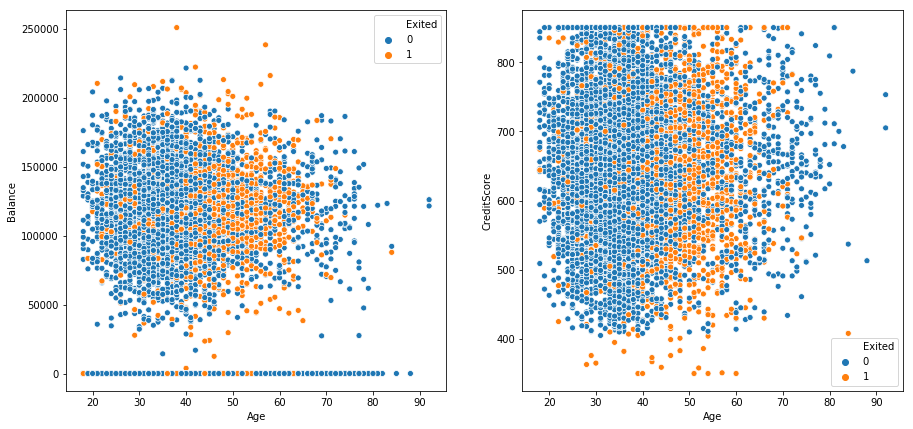

In [8]:
_, ax =  plt.subplots(1, 2, figsize=(15, 7))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.scatterplot(x = "Age", y = "Balance", hue = "Exited", cmap = cmap, sizes = (10, 200), data = dataset, ax=ax[0])
sns.scatterplot(x = "Age", y = "CreditScore", hue = "Exited", cmap = cmap, sizes = (10, 200), data = dataset, ax=ax[1])

* 40 to 70 years old customers are having higher chances to churn.

* Customer with CreditScore less then 400 are having higher chances to churn

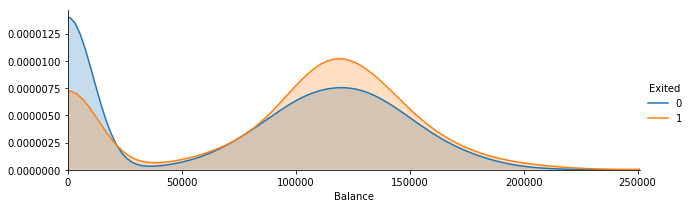

In [9]:
facet = sns.FacetGrid(dataset, hue="Exited",aspect=3)
facet.map(sns.kdeplot,"Balance",shade= True)
facet.set(xlim=(0, dataset["Balance"].max()))
facet.add_legend()
plt.show()

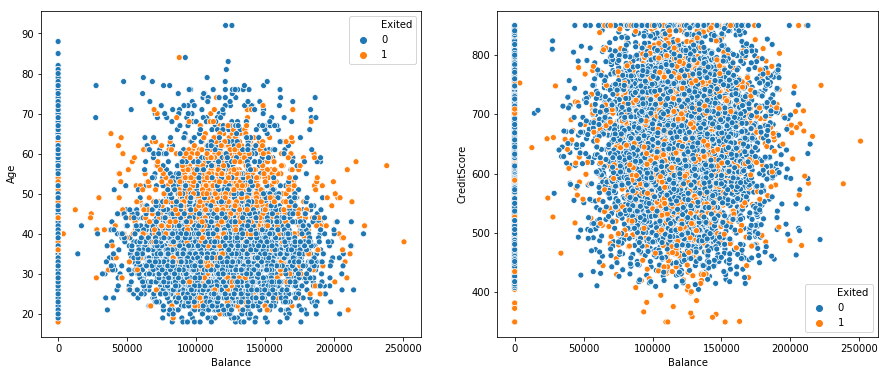

In [10]:
_, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.scatterplot(x = "Balance", y = "Age", data = dataset, hue="Exited", ax = ax[0])
sns.scatterplot(x = "Balance", y = "CreditScore", data = dataset, hue="Exited", ax = ax[1])

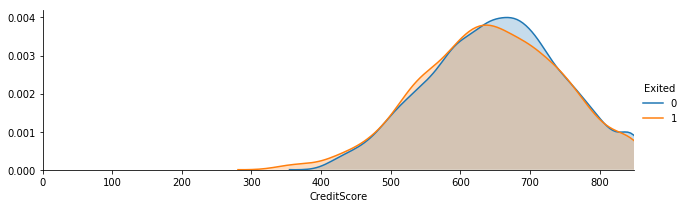

In [11]:
facet = sns.FacetGrid(dataset, hue="Exited",aspect=3)
facet.map(sns.kdeplot,"CreditScore",shade= True)
facet.set(xlim=(0, dataset["CreditScore"].max()))
facet.add_legend()
plt.show()

**Detecting Outliers using Tukey Boxplot**

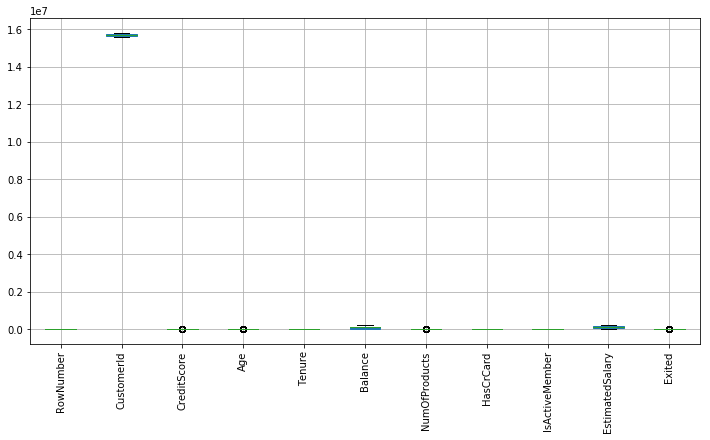

In [12]:
plt.figure(figsize=(12,6))
bplot = dataset.boxplot(patch_artist=True)
plt.xticks(rotation=90)       
plt.show()

**Checking Correlation**

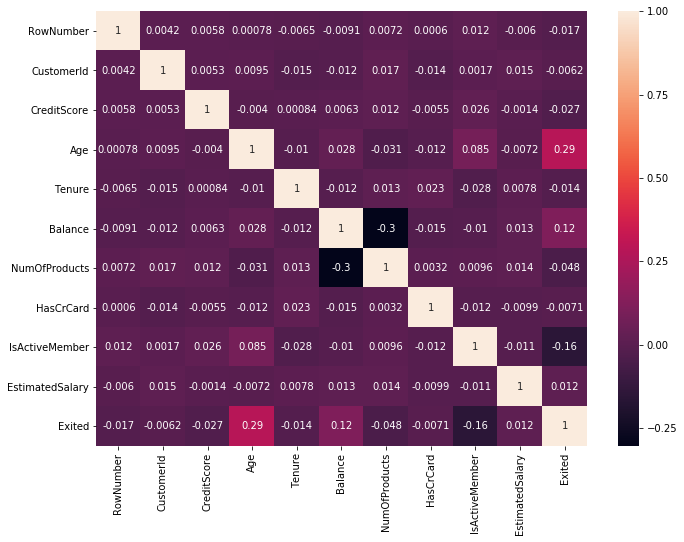

In [13]:
plt.subplots(figsize=(11,8))
sns.heatmap(dataset.corr(), annot=True)
plt.show()

##4. Data Preprocessing

It includes following steps:


*   Dropping unnecessary columns

*   Features transformation

*  Splitting the dataset into training and test set

*  Feature Scaling



In [0]:
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values

Encoding categorical features which are Geography & Gender. We will also do one hot encoding for Geography to avoid dummy variable trap.

In [15]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [0]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [0]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

##5. Fitting an Artificial Neural Network

###Model-1

In [18]:
# Importing the Libraries
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers

Using TensorFlow backend.


In [19]:
# Initialising the ANN
classifier_1 = Sequential()

# Adding the input layer and first hidden layer
classifier_1.add(Dense(activation='relu', input_dim=12, units=6, kernel_initializer='uniform'))

# Adding the second hidden layer
classifier_1.add(Dense(activation='relu', units=6, kernel_initializer='uniform'))

# Adding the Output layer
classifier_1.add(Dense(activation='sigmoid', units=1, kernel_initializer='uniform'))

# Compiling the Neural Network
classifier_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [20]:
# Fitting the Neural Network to the training set
history_1 = classifier_1.fit(X_train, y_train, batch_size=10, epochs=100, validation_data=(X_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 8000 samples, validate on 2000 samples
Epoch 1/100
8000/8000 [==============================] - 7s 817us/step - loss: 0.4827 - acc: 0.7956 - val_loss: 0.4196 - val_acc: 0.7975
Epoch 2/100
8000/8000 [==============================] - 4s 443us/step - loss: 0.4187 - acc: 0.7960 - val_loss: 0.4143 - val_acc: 0.7975
Epoch 3/100
8000/8000 [==============================] - 4s 441us/step - loss: 0.4100 - acc: 0.7960 - val_loss: 0.4046 - val_acc: 0.8235
Epoch 4/100
8000/8000 [==============================] - 3s 437us/step - loss: 0.4006 - acc: 0.8230 - val_loss: 0.3931 - val_acc: 0.8300
Epoch 5/100
8000/8000 [==============================] - 4s 440us/step - loss: 0.3937 - acc: 0.8265 - val_loss: 0.3878 - val_acc: 0.8310
Epoch 6/100
8000/8000 [==============================] - 3s 436us/step - loss: 0.3867 - acc: 0.8269 - val_loss: 0.3830 - val_acc: 0.8250
Epoch 7/100
8000/8000 [==============================] - 4s 442us/step - loss: 0.3

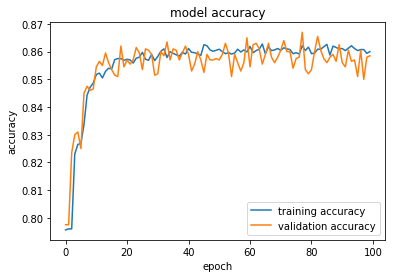

In [21]:
# summarize history for accuracy
plt.plot(history_1.history['acc'])
plt.plot(history_1.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training accuracy', 'validation accuracy'], loc='lower right')
plt.show()

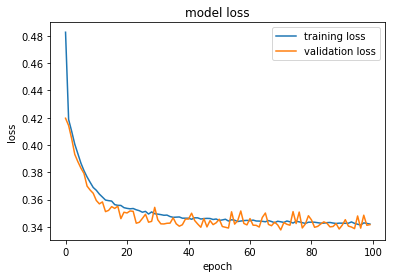

In [22]:
# summarize history for loss
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training loss', 'validation loss'], loc='upper right')
plt.show()

It’s not that bad! Our validation accuracy is at 85.85%. It means that we can correctly identify 85.85% of the customer churn in the validation set that weren’t seen by the model.

Can we improve it?


Yes!

We can see that the validation accuracy is way below the training accuracy. It means that our model is **underfitting**.

###Model-2

We can get rid of underfitting by adding some layers/neurons to the model.

In [0]:
# Initialising the ANN
classifier_2 = Sequential()

# Adding the input layer and first hidden layer
classifier_2.add(Dense(activation='relu', input_dim=12, units=11, kernel_initializer='uniform'))

# Adding the second hidden layer
classifier_2.add(Dense(activation='relu', units=10, kernel_initializer='uniform'))

# Adding the Output layer
classifier_2.add(Dense(activation='sigmoid', units=1, kernel_initializer='uniform'))

# Compiling the Neural Network
classifier_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
# Fitting the Neural Network to the training set
history_2 = classifier_2.fit(X_train, y_train, batch_size=10, epochs=100, validation_data=(X_test, y_test))

Train on 8000 samples, validate on 2000 samples
Epoch 1/100
8000/8000 [==============================] - 4s 470us/step - loss: 0.4762 - acc: 0.7955 - val_loss: 0.4258 - val_acc: 0.7975
Epoch 2/100
8000/8000 [==============================] - 4s 438us/step - loss: 0.4239 - acc: 0.8045 - val_loss: 0.4189 - val_acc: 0.8265
Epoch 3/100
8000/8000 [==============================] - 4s 438us/step - loss: 0.4157 - acc: 0.8280 - val_loss: 0.4110 - val_acc: 0.8425
Epoch 4/100
8000/8000 [==============================] - 4s 440us/step - loss: 0.4103 - acc: 0.8307 - val_loss: 0.4020 - val_acc: 0.8390
Epoch 5/100
8000/8000 [==============================] - 4s 443us/step - loss: 0.4060 - acc: 0.8335 - val_loss: 0.3996 - val_acc: 0.8425
Epoch 6/100
8000/8000 [==============================] - 4s 444us/step - loss: 0.4031 - acc: 0.8351 - val_loss: 0.3998 - val_acc: 0.8445
Epoch 7/100
8000/8000 [==============================] - 4s 441us/step - loss: 0.4015 - acc: 0.8364 - val_loss: 0.3959 - val_acc: 

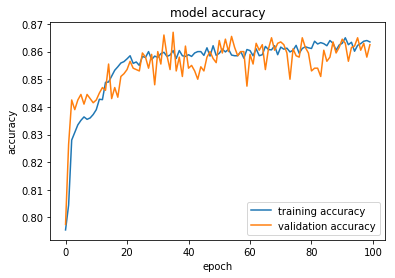

In [25]:
# summarize history for accuracy
plt.plot(history_2.history['acc'])
plt.plot(history_2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training accuracy', 'validation accuracy'], loc='lower right')
plt.show()

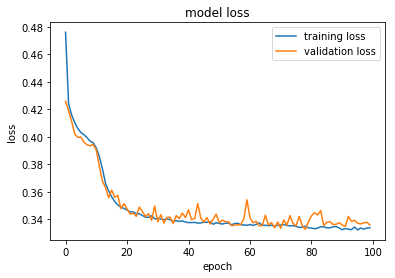

In [26]:
# summarize history for loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training loss', 'validation loss'], loc='upper right')
plt.show()

As we can see that we get almost same accuracy for the training set as well as the validation set which implies that our model has fit the data perfectly.